In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Portfolio Projects/Salary Estimation/glassdoor_jobs.csv')

In [ ]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa..."
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini"
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1
954,954,Data Engineer,-1,Loading...\n\nTitle: Data Engineer\n\nLocation...,4.8,IGNW\n4.8,"Austin, TX","Portland, OR",201 to 500 employees,2015,Company - Private,IT Services,Information Technology,$25 to $50 million (USD),Slalom


# Data Cleaning

## Salary Estimane column

In [ ]:
df['Salary Estimate'].unique()

array(['$53K-$91K (Glassdoor est.)', '$63K-$112K (Glassdoor est.)',
       '$80K-$90K (Glassdoor est.)', '$56K-$97K (Glassdoor est.)',
       '$86K-$143K (Glassdoor est.)', '$71K-$119K (Glassdoor est.)',
       '$54K-$93K (Glassdoor est.)', '$86K-$142K (Glassdoor est.)',
       '$38K-$84K (Glassdoor est.)', '$120K-$160K (Glassdoor est.)',
       '$126K-$201K (Glassdoor est.)', '$64K-$106K (Glassdoor est.)',
       '$106K-$172K (Glassdoor est.)', '$46K-$85K (Glassdoor est.)',
       '$83K-$144K (Glassdoor est.)', '$102K-$190K (Glassdoor est.)',
       '$67K-$137K (Glassdoor est.)', '$118K-$189K (Glassdoor est.)',
       '$110K-$175K (Glassdoor est.)', '$64K-$111K (Glassdoor est.)',
       '$81K-$130K (Glassdoor est.)', '$73K-$119K (Glassdoor est.)',
       '$86K-$139K (Glassdoor est.)', '$63K-$105K (Glassdoor est.)', '-1',
       '$109K-$177K (Glassdoor est.)', '$63K-$110K (Glassdoor est.)',
       '$75K-$124K (Glassdoor est.)', '$34K-$61K (Glassdoor est.)',
       '$72K-$120K (Glassdoo

upon analyzing we see that theres these types of vals here

1.   like - $53K-$91K (Glassdoor est.)
2.   like - Employer Provided Salary:$150K-$160K
3.   like - -1
4.   like - $21-$34 Per Hour(Glassdoor est.)
5.   like - $15K-$16K(Employer est.)



1st we deal with -1 vals

just filter them out

In [ ]:
df = df[df['Salary Estimate'] != '-1']

In [ ]:
for i in df.index:
  if df['Salary Estimate'].loc[i] == '-1':
    print(i , df['Salary Estimate'].loc[i])

now we remove texts from these vals -> (Glassdoor est.), Employer Provided Salary: , (Employer est.) 

In [ ]:
df['Salary Estimate new'] = df['Salary Estimate'] # create new col, old col as backup
df['Salary Estimate new'] = df['Salary Estimate new'].str.replace('(Glassdoor est.)', '')
df['Salary Estimate new'] = df['Salary Estimate new'].str.replace('Employer Provided Salary:', '')
df['Salary Estimate new'] = df['Salary Estimate new'].str.replace('(Employer est.)', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWar

In [ ]:
df['Salary Estimate new'].unique()

array(['$53K-$91K ()', '$63K-$112K ()', '$80K-$90K ()', '$56K-$97K ()',
       '$86K-$143K ()', '$71K-$119K ()', '$54K-$93K ()', '$86K-$142K ()',
       '$38K-$84K ()', '$120K-$160K ()', '$126K-$201K ()',
       '$64K-$106K ()', '$106K-$172K ()', '$46K-$85K ()', '$83K-$144K ()',
       '$102K-$190K ()', '$67K-$137K ()', '$118K-$189K ()',
       '$110K-$175K ()', '$64K-$111K ()', '$81K-$130K ()',
       '$73K-$119K ()', '$86K-$139K ()', '$63K-$105K ()',
       '$109K-$177K ()', '$63K-$110K ()', '$75K-$124K ()', '$34K-$61K ()',
       '$72K-$120K ()', '$93K-$149K ()', '$85K-$140K ()', '$77K-$135K ()',
       '$82K-$132K ()', '$83K-$137K ()', '$115K-$180K ()',
       '$74K-$138K ()', '$64K-$112K ()', '$68K-$129K ()', '$52K-$113K ()',
       '$110K-$150K()', '$150K-$160K', '$158K-$211K ()', '$20K-$39K ()',
       '$56K-$117K ()', '$63K-$99K ()', '$68K-$114K ()', '$41K-$95K ()',
       '$86K-$144K ()', '$80K-$139K ()', '$56K-$95K ()', '$120K-$189K ()',
       '$111K-$176K ()', '$84K-$146K (

theres () left for some reason, remove them as well

solution - write 2 codes that will remove ( & ) separately 

In [ ]:
df['Salary Estimate new'] = df['Salary Estimate new'].str.replace('(', '')
df['Salary Estimate new'] = df['Salary Estimate new'].str.replace(')', '')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  
/usr/local/li

In [ ]:
df['Salary Estimate new'].unique()

array(['$53K-$91K ', '$63K-$112K ', '$80K-$90K ', '$56K-$97K ',
       '$86K-$143K ', '$71K-$119K ', '$54K-$93K ', '$86K-$142K ',
       '$38K-$84K ', '$120K-$160K ', '$126K-$201K ', '$64K-$106K ',
       '$106K-$172K ', '$46K-$85K ', '$83K-$144K ', '$102K-$190K ',
       '$67K-$137K ', '$118K-$189K ', '$110K-$175K ', '$64K-$111K ',
       '$81K-$130K ', '$73K-$119K ', '$86K-$139K ', '$63K-$105K ',
       '$109K-$177K ', '$63K-$110K ', '$75K-$124K ', '$34K-$61K ',
       '$72K-$120K ', '$93K-$149K ', '$85K-$140K ', '$77K-$135K ',
       '$82K-$132K ', '$83K-$137K ', '$115K-$180K ', '$74K-$138K ',
       '$64K-$112K ', '$68K-$129K ', '$52K-$113K ', '$110K-$150K',
       '$150K-$160K', '$158K-$211K ', '$20K-$39K ', '$56K-$117K ',
       '$63K-$99K ', '$68K-$114K ', '$41K-$95K ', '$86K-$144K ',
       '$80K-$139K ', '$56K-$95K ', '$120K-$189K ', '$111K-$176K ',
       '$84K-$146K ', '$107K-$172K ', '$49K-$85K ', '$61K-$109K ',
       '$88K-$148K ', '$60K-$99K ', '$41K-$72K ', '$96K-$161K 

now we 

1.   remove $ sign
2.   replace k with '000' [eg 16k - 22k = 16000 - 22000]

In [ ]:
df['Salary Estimate new'] = df['Salary Estimate new'].str.replace('$', '')
df['Salary Estimate new'] = df['Salary Estimate new'].str.replace('K', '000')

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/panda

In [ ]:
df['Salary Estimate new'].unique()

array(['53000-91000 ', '63000-112000 ', '80000-90000 ', '56000-97000 ',
       '86000-143000 ', '71000-119000 ', '54000-93000 ', '86000-142000 ',
       '38000-84000 ', '120000-160000 ', '126000-201000 ',
       '64000-106000 ', '106000-172000 ', '46000-85000 ', '83000-144000 ',
       '102000-190000 ', '67000-137000 ', '118000-189000 ',
       '110000-175000 ', '64000-111000 ', '81000-130000 ',
       '73000-119000 ', '86000-139000 ', '63000-105000 ',
       '109000-177000 ', '63000-110000 ', '75000-124000 ', '34000-61000 ',
       '72000-120000 ', '93000-149000 ', '85000-140000 ', '77000-135000 ',
       '82000-132000 ', '83000-137000 ', '115000-180000 ',
       '74000-138000 ', '64000-112000 ', '68000-129000 ', '52000-113000 ',
       '110000-150000', '150000-160000', '158000-211000 ', '20000-39000 ',
       '56000-117000 ', '63000-99000 ', '68000-114000 ', '41000-95000 ',
       '86000-144000 ', '80000-139000 ', '56000-95000 ', '120000-189000 ',
       '111000-176000 ', '84000-1460

now were left with "Per Hour' values, lets just see how many of these vals are there



In [ ]:
j = 0
for i in df.index:
  if 'hour' in df['Salary Estimate new'].loc[i].lower():
    print(i , df['Salary Estimate new'].loc[i])   

197 17-24 Per Hour
209 21-34 Per Hour
240 18-25 Per Hour
247 21-34 Per Hour
257 15-25 Per Hour
307 17-24 Per Hour
337 21-34 Per Hour
427 18-25 Per Hour
437 24-39 Per Hour
456 21-34 Per Hour
464 25-28 Per Hour
522 21-29 Per Hour
523 10-17 Per Hour
632 18-25 Per Hour
652 24-39 Per Hour
682 21-34 Per Hour
694 25-28 Per Hour
786 21-29 Per Hour
787 10-17 Per Hour
823 27-47 Per Hour
854 18-25 Per Hour
875 24-39 Per Hour
919 21-34 Per Hour
936 25-28 Per Hour


you could delete these rows with these vals

but just for a challenge we'll try to convert these to per anum

logic - assuming an avg person works 8 hrs a day, which means 8x5= 40 hrs a week[assuming holidays at weekends] , which means 40x50 hrs = 2000 [52 weeks in an yr, but lets assume 2 weeks in holidays]

=> annual income = hourly income x 2000

now we're left with vals like these  --->  61000-106000, 25-28 Per Hour

for  61000-106000 vals --> well just split these with '-' as delimiter then their sum/2

for hour vals we'll do the same , just x 2000

In [ ]:
for i in df.index:
  if 'hour' not in str(df['Salary Estimate new'].loc[i]).lower():
    temp = df['Salary Estimate new'].loc[i].split('-' , 2)
    temp2 = (float(temp[0]) + float(temp[1])) / 2
    df['Salary Estimate new'].loc[i] = temp2

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
for i in df.index:
  if 'hour' in str(df['Salary Estimate new'].loc[i]).lower():

    temp3 = df['Salary Estimate new'].loc[i].replace('Per Hour', '') # 1st remove 'Per Hour' substr for conversion to float
    temp4 = temp3.split('-' , 2)
    temp5 = (float(temp4[0]) + float(temp4[1]))*2000 / 2 # x 2000 cus already discussed above
    df['Salary Estimate new'].loc[i] = temp5

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['Salary Estimate new'] = df['Salary Estimate new'].astype(float)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


## Company Name

In [ ]:
df['Company Name'].unique()

array(['Tecolote Research\n3.8',
       'University of Maryland Medical System\n3.4', 'KnowBe4\n4.8',
       'PNNL\n3.8', 'Affinity Solutions\n2.9', 'CyrusOne\n3.4',
       'ClearOne Advantage\n4.1', 'Logic20/20\n3.8',
       'Rochester Regional Health\n3.3', '<intent>\n4.6', 'Wish\n3.5',
       'ManTech\n4.1', 'Walmart\n3.2', 'Yesler\n4.1',
       'Takeda Pharmaceuticals\n3.7', 'Audible\n3.6',
       'Blueprint Medicines\n3.9', 'h2o.ai\n4.3', 'Nuna\n4.2',
       'Pinnacol Assurance\n4.0', 'Porch\n3.2', 'Health IQ\n3.9',
       'Truckstop.com\n3.8', 'SMC 3\n4.3', 'Novetta\n4.0', 'Pfizer\n4.0',
       'First Tech Federal Credit Union\n3.5',
       'The Hanover Insurance Group\n3.7', 'Amrock\n3.6', 'Novartis\n3.8',
       'Juniper Networks\n3.8', 'New England Biolabs\n4.7',
       'Clarity Insights\n4.2', 'Esri\n3.5',
       'Systems & Technology Research\n4.7', 'Sartorius\n3.5',
       'Lancer Insurance\n3.5', 'Sauce Labs\n4.2', 'Persivia\n3.6',
       'Edgewell Personal Care\n3.4', 'Eq

you see that the vals in this format ---> companyName \n ratings

eg Rodan and Fields, LLC\n2.2 , 

so here well use split('\n' as delimiter) for separating comp. name & ratings

In [ ]:
new_cols = df['Company Name'].str.split('\n' , 1 , expand = True)

In [ ]:
new_cols.head(3)

,0,1
0,Tecolote Research,3.8
1,University of Maryland Medical System,3.4
2,KnowBe4,4.8


but since theres already rating column, so we'll just make company name col 

In [ ]:
df['company name new'] = new_cols[0]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary Estimate new,company name new
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,72000.0,Tecolote Research
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,87500.0,University of Maryland Medical System
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,85000.0,KnowBe4
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",76500.0,PNNL
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",114500.0,Affinity Solutions
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",84500.0,GSK
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",102500.0,Eventbrite
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,73500.0,Software Engineering Institute
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,127500.0,"Numeric, LLC"


## Location Column

In [ ]:
df['Location'].unique()

array(['Albuquerque, NM', 'Linthicum, MD', 'Clearwater, FL',
       'Richland, WA', 'New York, NY', 'Dallas, TX', 'Baltimore, MD',
       'San Jose, CA', 'Rochester, NY', 'Chantilly, VA', 'Plano, TX',
       'Seattle, WA', 'Cambridge, MA', 'Newark, NJ', 'Mountain View, CA',
       'San Francisco, CA', 'Denver, CO', 'Chicago, IL', 'Louisville, KY',
       'Herndon, VA', 'Hillsboro, OR', 'Worcester, MA', 'Groton, CT',
       'Detroit, MI', 'Sunnyvale, CA', 'Ipswich, MA', 'Redlands, CA',
       'Woburn, MA', 'Fremont, CA', 'Long Beach, NY', 'Marlborough, MA',
       'Allendale, NJ', 'Washington, DC', 'Bellevue, WA', 'Longmont, CO',
       'Beavercreek, OH', 'Peoria, IL', 'Fort Lauderdale, FL',
       'Boston, MA', 'Huntsville, AL', 'Armonk, NY', 'San Diego, CA',
       'Saint Louis, MO', 'Cincinnati, OH', 'Palo Alto, CA',
       'Coraopolis, PA', 'Framingham, MA', 'Atlanta, GA',
       'Philadelphia, PA', 'Vancouver, WA', 'Indianapolis, IN',
       'Lake Forest, IL', 'Maryland Heights, MO

here you see that the vals are written in this format --> city, State

we again use split(, as delimiter) to create 2 cols --> city , State & do the same as we did for company name column

In [ ]:
new_cols = df['Location'].str.split(',' , 1 , expand = True)

In [ ]:
df['city'] = new_cols[0]
df['state'] = new_cols[1]

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [ ]:
df

,Unnamed: 0,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,Industry,Sector,Revenue,Competitors,Salary Estimate new,company name new,city,state
0,0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,Aerospace & Defense,Aerospace & Defense,$50 to $100 million (USD),-1,72000.0,Tecolote Research,Albuquerque,NM
1,1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,Health Care Services & Hospitals,Health Care,$2 to $5 billion (USD),-1,87500.0,University of Maryland Medical System,Linthicum,MD
2,2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,Security Services,Business Services,$100 to $500 million (USD),-1,85000.0,KnowBe4,Clearwater,FL
3,3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,Energy,"Oil, Gas, Energy & Utilities",$500 million to $1 billion (USD),"Oak Ridge National Laboratory, National Renewa...",76500.0,PNNL,Richland,WA
4,4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,Advertising & Marketing,Business Services,Unknown / Non-Applicable,"Commerce Signals, Cardlytics, Yodlee",114500.0,Affinity Solutions,New York,NY
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,Biotech & Pharmaceuticals,Biotech & Pharmaceuticals,$10+ billion (USD),"Pfizer, AstraZeneca, Merck",84500.0,GSK,Cambridge,MA
951,951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,Internet,Information Technology,$100 to $500 million (USD),"See Tickets, TicketWeb, Vendini",102500.0,Eventbrite,Nashville,TN
952,952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,Colleges & Universities,Education,Unknown / Non-Applicable,-1,73500.0,Software Engineering Institute,Pittsburgh,PA
953,953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,Staffing & Outsourcing,Business Services,$5 to $10 million (USD),-1,127500.0,"Numeric, LLC",Allentown,PA


## Job Description column

this contains all the requirements & eligibilities to apply for jobs -- technical skills etc

so we'll extract those skills into new columns with boolean vals [0,1]

eg - python, r studio , spark , aws , excel

you can also make columns like sql, tableau , power bi , alteryx etc...

In [ ]:
# initalise cols as 0
df['python'] = 0
df['r_studio'] = 0
df['spark'] = 0
df['aws'] = 0
df['excel'] = 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

In [ ]:
for i in df.index:
  if 'python' in df['Job Description'].loc[i].lower():
    df['python'].loc[i] = 1 #

  if ('r' in df['Job Description'].loc[i].lower()) and 'studio' in df['Job Description'].loc[i].lower():
    df['r_studio'].loc[i] = 1 # 

  if 'spark' in df['Job Description'].loc[i].lower():
    df['spark'].loc[i] = 1 #        

  if 'aws' in df['Job Description'].loc[i].lower():
    df['aws'].loc[i] = 1 #    

  if 'excel' in df['Job Description'].loc[i].lower():
    df['excel'].loc[i] = 1 #    

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df = df.drop(['Unnamed: 0'] , axis = 1)

In [ ]:
df.shape

(742, 23)

## Save the new cleaned data

In [ ]:
# df.to_csv('cleaned_data.csv' , index = False)

In [ ]:
df

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,Competitors,Salary Estimate new,company name new,city,state,python,r_studio,spark,aws,excel
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,-1,72000.0,Tecolote Research,Albuquerque,NM,1,0,0,0,1
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,-1,87500.0,University of Maryland Medical System,Linthicum,MD,1,0,0,0,0
2,Data Scientist,$80K-$90K (Glassdoor est.),"KnowBe4, Inc. is a high growth information sec...",4.8,KnowBe4\n4.8,"Clearwater, FL","Clearwater, FL",501 to 1000 employees,2010,Company - Private,...,-1,85000.0,KnowBe4,Clearwater,FL,1,0,1,0,1
3,Data Scientist,$56K-$97K (Glassdoor est.),*Organization and Job ID**\nJob ID: 310709\n\n...,3.8,PNNL\n3.8,"Richland, WA","Richland, WA",1001 to 5000 employees,1965,Government,...,"Oak Ridge National Laboratory, National Renewa...",76500.0,PNNL,Richland,WA,1,0,0,0,0
4,Data Scientist,$86K-$143K (Glassdoor est.),Data Scientist\nAffinity Solutions / Marketing...,2.9,Affinity Solutions\n2.9,"New York, NY","New York, NY",51 to 200 employees,1998,Company - Private,...,"Commerce Signals, Cardlytics, Yodlee",114500.0,Affinity Solutions,New York,NY,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
950,"Sr Scientist, Immuno-Oncology - Oncology",$58K-$111K (Glassdoor est.),Site Name: USA - Massachusetts - Cambridge\nPo...,3.9,GSK\n3.9,"Cambridge, MA","Brentford, United Kingdom",10000+ employees,1830,Company - Public,...,"Pfizer, AstraZeneca, Merck",84500.0,GSK,Cambridge,MA,0,0,0,1,0
951,Senior Data Engineer,$72K-$133K (Glassdoor est.),THE CHALLENGE\nEventbrite has a world-class da...,4.4,Eventbrite\n4.4,"Nashville, TN","San Francisco, CA",1001 to 5000 employees,2006,Company - Public,...,"See Tickets, TicketWeb, Vendini",102500.0,Eventbrite,Nashville,TN,1,0,1,1,0
952,"Project Scientist - Auton Lab, Robotics Institute",$56K-$91K (Glassdoor est.),The Auton Lab at Carnegie Mellon University is...,2.6,Software Engineering Institute\n2.6,"Pittsburgh, PA","Pittsburgh, PA",501 to 1000 employees,1984,College / University,...,-1,73500.0,Software Engineering Institute,Pittsburgh,PA,0,0,0,0,1
953,Data Science Manager,$95K-$160K (Glassdoor est.),Data Science ManagerResponsibilities:\n\nOvers...,3.2,"Numeric, LLC\n3.2","Allentown, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,-1,127500.0,"Numeric, LLC",Allentown,PA,0,0,0,0,1


# Exploratory data analysis & some data cleaning

## Exploring Job Title column & cleaning

In [ ]:
df['Job Title'].unique()

array(['Data Scientist', 'Healthcare Data Scientist',
       'Research Scientist', 'Staff Data Scientist - Technology',
       'Data Analyst', 'Data Engineer I', 'Scientist I/II, Biology',
       'Customer Data Scientist',
       'Data Scientist - Health Data Analytics',
       'Senior Data Scientist / Machine Learning',
       'Data Scientist - Quantitative', 'Digital Health Data Scientist',
       'Associate Data Analyst', 'Clinical Data Scientist',
       'Data Scientist / Machine Learning Expert', 'Web Data Analyst',
       'Senior Data Scientist', 'Data Engineer',
       'Data Scientist - Algorithms & Inference', 'Scientist',
       'Lead Data Scientist', 'Spectral Scientist/Engineer',
       'College Hire - Data Scientist - Open to December 2019 Graduates',
       'Data Scientist, Office of Data Science', 'Data Science Analyst',
       'Senior Risk Data Scientist',
       'Data Scientist in Artificial Intelligence Early Career',
       'Data Scientist - Research', 'R&D Data Analy

upon analyzing these vals we can see that there's usually these job openings

data scientisis, data engineer , data analyst/Analytics , Machine Learning Expert/engineer

so we'll simplify these job titles 

but before that

notice that these vals also mentions the job levels of job titles like---

senior , mid lve , jr  etc

so we can derive another column - experience_lvl from Job Title column

extract these experience lvls from job titles & put them in new col -- exp_lvl

1st we derive col - exp_lvl 

In [ ]:
df['exp_lvl'] = 'not defined'

for i in df.index:
  if 'sr' in df['Job Title'].loc[i].lower() or 'senior' in df['Job Title'].loc[i].lower() or 'sr' in df['Job Title'].loc[i].lower() or 'lead' in df['Job Title'].loc[i].lower() or 'principal' in df['Job Title'].loc[i].lower():
    df['exp_lvl'].loc[i] = 'senior'

  if 'jr' in df['Job Title'].loc[i].lower() or 'jr.' in df['Job Title'].loc[i].lower(): 
    df['exp_lvl'].loc[i] = 'junior'


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['exp_lvl'].value_counts()

not defined    520
senior         220
junior           2
Name: exp_lvl, dtype: int64

now to simplify job titles

In [ ]:
#initialize new column
df['job title new'] = 'not defined'

for i in df.index:
   if 'data scientist' in df['Job Title'].loc[i].lower():
     df['job title new'].loc[i] = 'data scientist'

   if 'data engineer' in df['Job Title'].loc[i].lower():
     df['job title new'].loc[i] = 'data engineer'     

   if 'analyst' in df['Job Title'].loc[i].lower() or 'analytics' in df['Job Title'].loc[i].lower():
     df['job title new'].loc[i] = 'data analyst'

   if 'machine learning' in df['Job Title'].loc[i].lower():
     df['job title new'].loc[i] = 'ml engineer' 

   if 'manager' in df['Job Title'].loc[i].lower():
     df['job title new'].loc[i] = 'manager'  

   if 'director' in df['Job Title'].loc[i].lower():
     df['job title new'].loc[i] = 'director'              

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['job title new'].value_counts()

data scientist    262
not defined       172
data analyst      122
data engineer     115
ml engineer        29
manager            25
director           17
Name: job title new, dtype: int64

## Fix state column

In [ ]:
df['state'].value_counts()

 CA                 151
 MA                 103
 NY                  72
 VA                  41
 IL                  40
 MD                  35
 PA                  33
 TX                  28
 WA                  21
 NC                  21
 NJ                  17
 FL                  16
 OH                  14
 TN                  13
 DC                  11
 CO                  11
 WI                  10
 IN                  10
 UT                  10
 AZ                   9
 MO                   9
 AL                   8
 GA                   6
 KY                   6
 DE                   6
 MI                   6
 CT                   5
 IA                   5
 LA                   4
 OR                   4
 NE                   4
 NM                   3
 KS                   3
 ID                   2
 MN                   2
 Los Angeles, CA      1
 RI                   1
 SC                   1
Name: state, dtype: int64

theres this Los Angeles, CA val, just remove Los Angeles from this

In [ ]:
df['state'] = df['state'].str.replace('Los Angeles, ', '')

## Job description

here we'll find length of job descriptions & store in new col

my theory is that bigger job descriptions means better salary, but we'll test this theory in EDA phase

In [ ]:
df['job_desc_len'] = 0

In [ ]:
for i in df.index:
  df['job_desc_len'].loc[i] = len(df['Job Description'].loc[i])


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df['job_desc_len']

0      2536
1      4783
2      3461
3      3883
4      2728
       ... 
950    6162
951    6130
952    3078
953    1642
955    3673
Name: job_desc_len, Length: 742, dtype: int64

## Competitors column

In [ ]:
df['Competitors']

0                                                     -1
1                                                     -1
2                                                     -1
3      Oak Ridge National Laboratory, National Renewa...
4                   Commerce Signals, Cardlytics, Yodlee
                             ...                        
950                           Pfizer, AstraZeneca, Merck
951                      See Tickets, TicketWeb, Vendini
952                                                   -1
953                                                   -1
955                                                   -1
Name: Competitors, Length: 742, dtype: object

you can see that this col contains list of competetors of each company

in some cases theres multiple competetors of single company separated by -,-

we can find no_of_competetors of each company 

then we'll see how salary varies with no of Competitors

we also need to take care of -1 vals,

In [ ]:
df['no_of_competetors'] = 0 # initialize

for i in df.index:
  if df['Competitors'].loc[i] == '-1': # if theres -1 in this col 
    df['no_of_competetors'].loc[i] = 0 # ie no competetor

  if df['Competitors'].loc[i] != '-1':
    temp = df['Competitors'].loc[i].split(',') # convert those vals into a list variable
    df['no_of_competetors'].loc[i] = len(temp) # len of that list ie no of entries in that list

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [ ]:
df.describe()

,Rating,Founded,Salary Estimate new,python,r_studio,spark,aws,excel,job_desc_len,no_of_competetors
count,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000,742.000000
mean,3.618868,1837.154987,101434.636119,0.528302,0.018868,0.225067,0.237197,0.522911,3869.545822,1.053908
std,0.801210,497.183763,37546.122421,0.499535,0.136150,0.417908,0.425651,0.499812,1521.495868,1.384239
min,-1.000000,-1.000000,15500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,407.000000,0.000000
25%,3.300000,1939.000000,73500.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2801.000000,0.000000
50%,3.700000,1988.000000,97500.000000,1.000000,0.000000,0.000000,0.000000,1.000000,3731.000000,0.000000
75%,4.000000,2007.000000,122500.000000,1.000000,0.000000,0.000000,0.000000,1.000000,4740.000000,3.000000
max,5.000000,2019.000000,254000.000000,1.000000,1.000000,1.000000,1.000000,1.000000,10051.000000,4.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Job Title            742 non-null    object 
 1   Salary Estimate      742 non-null    object 
 2   Job Description      742 non-null    object 
 3   Rating               742 non-null    float64
 4   Company Name         742 non-null    object 
 5   Location             742 non-null    object 
 6   Headquarters         742 non-null    object 
 7   Size                 742 non-null    object 
 8   Founded              742 non-null    int64  
 9   Type of ownership    742 non-null    object 
 10  Industry             742 non-null    object 
 11  Sector               742 non-null    object 
 12  Revenue              742 non-null    object 
 13  Competitors          742 non-null    object 
 14  Salary Estimate new  742 non-null    float64
 15  company name new     742 non-null    obj

## Visualizations & Analysis

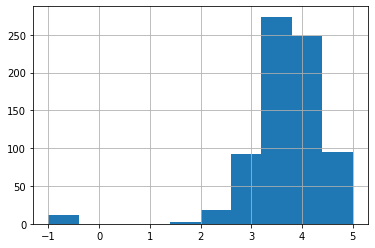

In [ ]:
df['Rating'].hist()

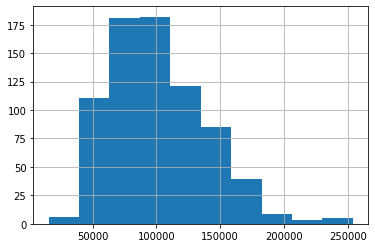

In [ ]:
df['Salary Estimate new'].hist()

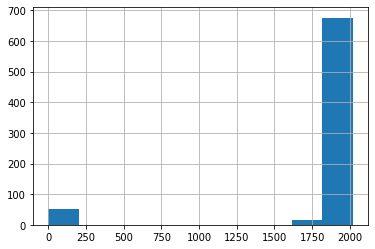

In [ ]:
df['Founded'].hist()

theres some qiote old companies here , lets take a look at them

In [ ]:
df[df['Founded']< 500]

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,state,python,r_studio,spark,aws,excel,exp_lvl,job title new,job_desc_len,no_of_competetors
43,Data Engineer,$68K-$129K (Glassdoor est.),Position Title: Data Engineer\n\nPersivia is s...,3.6,Persivia\n3.6,"Marlborough, MA","Lowell, MA",1 to 50 employees,-1,Company - Private,...,MA,0,0,0,0,1,not defined,data engineer,1996,0
48,Data Scientist,Employer Provided Salary:$150K-$160K,"BPA Services, LLC is seeking a Computer/Data S...",5.0,BPA Services\n5.0,"Washington, DC","Alexandria, VA",Unknown,-1,Company - Private,...,DC,0,0,0,1,1,not defined,data scientist,3213,0
76,Data Scientist,$96K-$161K (Glassdoor est.),SummaryProvide data management and statistical...,3.2,"Numeric, LLC\n3.2","Philadelphia, PA","Chadds Ford, PA",1 to 50 employees,-1,Company - Private,...,PA,1,0,1,1,0,not defined,data scientist,2306,0
166,Data Engineer 4 - Contract,$59K-$115K (Glassdoor est.),Purposes\n\nAs a member of the Business Intell...,4.2,The Church of Jesus Christ of Latter-day Saint...,"Riverton, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,...,UT,0,0,0,1,1,not defined,data engineer,3066,0
192,Data Engineer 5 - Contract (Remote),$74K-$140K (Glassdoor est.),Purposes\n\nThis is a remote contract position...,4.2,The Church of Jesus Christ of Latter-day Saint...,"Riverton, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,...,UT,0,0,0,0,1,not defined,data engineer,2617,0
223,PV Scientist,$60K-$123K (Glassdoor est.),SUMMARY:\nThe Pharmacovigilance Scientist supp...,2.9,Karyopharm Therapeutics Inc.\n2.9,"Newton, MA","Newton, MA",201 to 500 employees,-1,Company - Public,...,MA,0,0,0,0,1,not defined,not defined,3984,0
226,Data Engineer,$48K-$93K (Glassdoor est.),Are you interested in a career opportunity wit...,3.7,P2 Energy Solutions\n3.7,"Lafayette, LA","Denver, CO",501 to 1000 employees,-1,Company - Private,...,LA,0,0,0,0,1,not defined,data engineer,3670,0
242,R&D Specialist/ Food Scientist,$39K-$66K (Glassdoor est.),Responsibilities Include but may not be limite...,2.4,Teasdale Latin Foods\n2.4,"Hoopeston, IL","Flower Mound, TX",501 to 1000 employees,-1,Company - Private,...,IL,0,0,0,0,0,not defined,not defined,2433,0
270,Data Analyst,$33K-$62K (Glassdoor est.),"Wednesday, March 11, 2020\n\n\nCommunity Actio...",2.8,Community Action Partnership of San Luis Obisp...,"Parlier, CA","San Luis Obispo, CA",501 to 1000 employees,-1,Nonprofit Organization,...,CA,0,0,0,0,1,not defined,data analyst,5435,0
282,Data Engineer 5 - Contract (Remote),$74K-$140K (Glassdoor est.),Purposes\n\nThis is a remote contract position...,4.2,The Church of Jesus Christ of Latter-day Saint...,"Riverton, UT","Salt Lake City, UT",10000+ employees,-1,Nonprofit Organization,...,UT,0,0,0,0,1,not defined,data engineer,2617,0


these are vals with -1 , lets filter them out

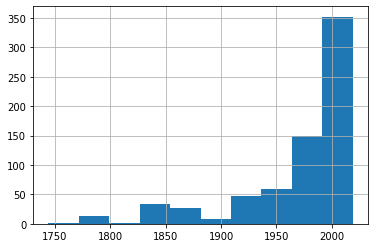

In [ ]:
temp = df[df['Founded']> -1]
temp['Founded'].hist()

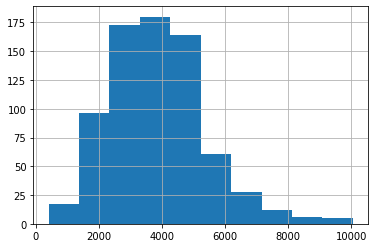

In [ ]:
df['job_desc_len'].hist()

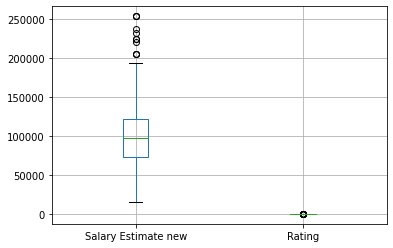

In [ ]:
df.boxplot(column = ['Salary Estimate new','Rating'])

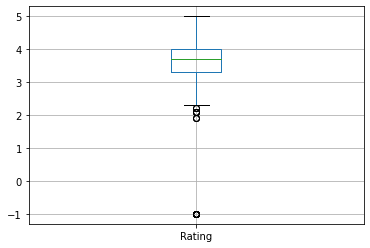

In [ ]:
df.boxplot(column = 'Rating')

In [ ]:
df.corr()

,Rating,Founded,Salary Estimate new,python,r_studio,spark,aws,excel,job_desc_len,no_of_competetors
Rating,1.000000,0.332927,0.012517,0.144665,0.005392,0.156982,0.117049,-0.036466,-0.012281,0.027190
Founded,0.332927,1.000000,-0.009947,0.103183,0.032991,0.066978,-0.011123,-0.035567,0.083119,0.191265
Salary Estimate new,0.012517,-0.009947,1.000000,0.316423,-0.087933,0.171104,0.172602,-0.071492,0.070474,0.083263
python,0.144665,0.103183,0.316423,1.000000,0.031823,0.347619,0.203221,-0.021519,0.019143,0.091470
r_studio,0.005392,0.032991,-0.087933,0.031823,1.000000,-0.051017,-0.054043,0.033302,-0.042565,-0.019726
spark,0.156982,0.066978,0.171104,0.347619,-0.051017,1.000000,0.298822,-0.047334,0.044135,0.069980
aws,0.117049,-0.011123,0.172602,0.203221,-0.054043,0.298822,1.000000,-0.019235,0.133097,-0.014860
excel,-0.036466,-0.035567,-0.071492,-0.021519,0.033302,-0.047334,-0.019235,1.000000,0.118875,-0.031046
job_desc_len,-0.012281,0.083119,0.070474,0.019143,-0.042565,0.044135,0.133097,0.118875,1.000000,0.104620
no_of_competetors,0.027190,0.191265,0.083263,0.091470,-0.019726,0.069980,-0.014860,-0.031046,0.104620,1.000000


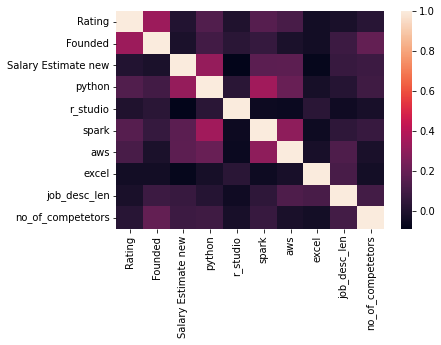

In [ ]:
sns.heatmap(df.corr())

In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary Estimate new', 'company name new', 'city', 'state', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'exp_lvl', 'job title new',
       'job_desc_len', 'no_of_competetors'],
      dtype='object')

In [ ]:
cols_for_graph = ['Salary Estimate new','Rating','Location','Size','Founded','Type of ownership','Revenue','Sector', 'python', 'r_studio', 'spark', 'aws', 'excel', 'exp_lvl','job_desc_len', 'no_of_competetors','job title new']

graph for Salary Estimate new: total = 219


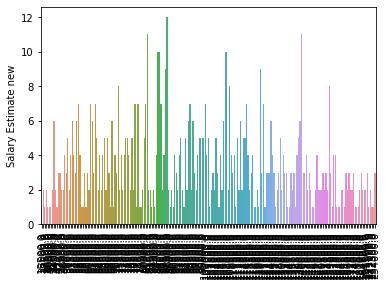

graph for Rating: total = 31


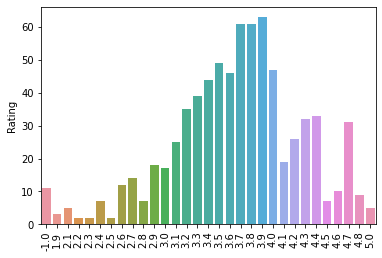

graph for Location: total = 200


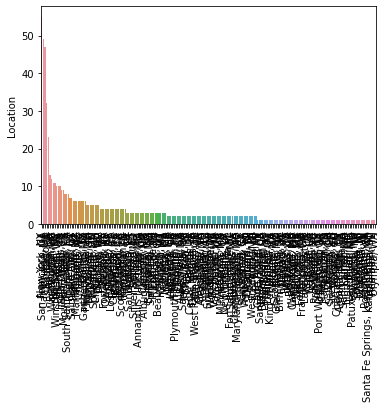

graph for Size: total = 9


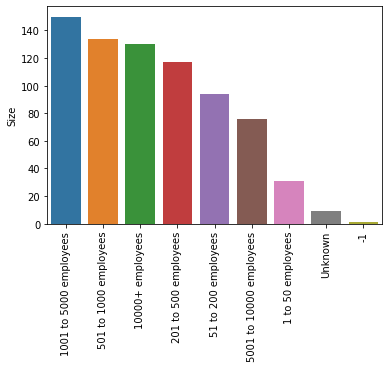

graph for Founded: total = 102


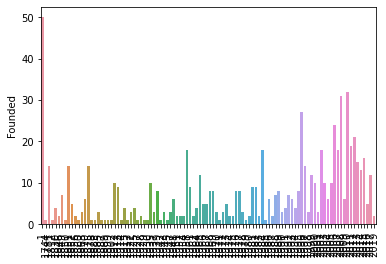

graph for Type of ownership: total = 11


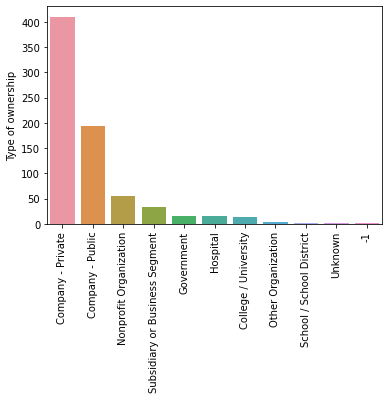

graph for Revenue: total = 14


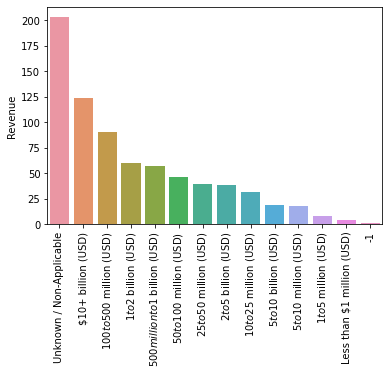

graph for Sector: total = 25


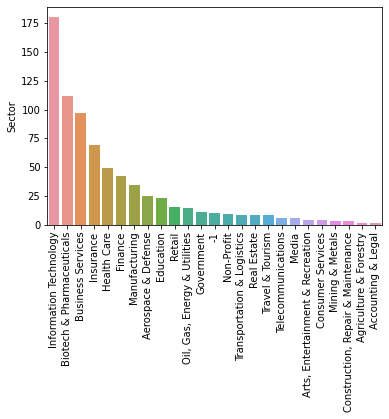

graph for python: total = 2


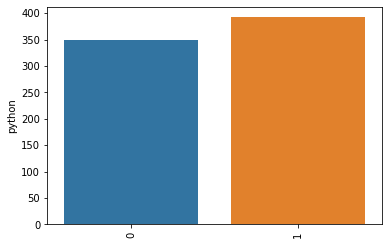

graph for r_studio: total = 2


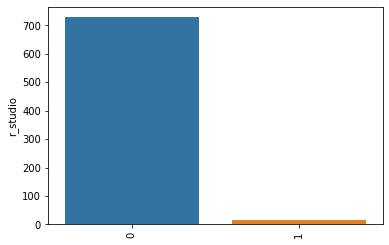

graph for spark: total = 2


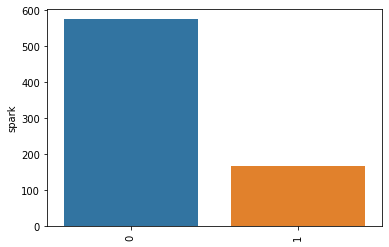

graph for aws: total = 2


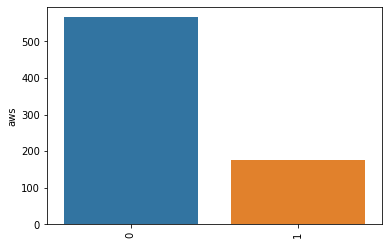

graph for excel: total = 2


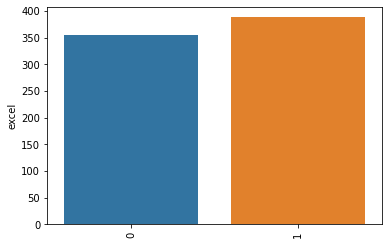

graph for exp_lvl: total = 3


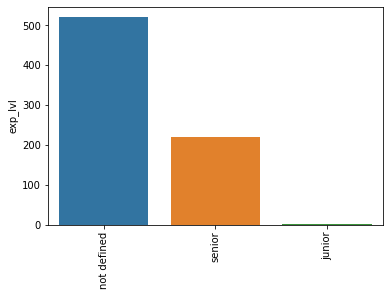

graph for job_desc_len: total = 443


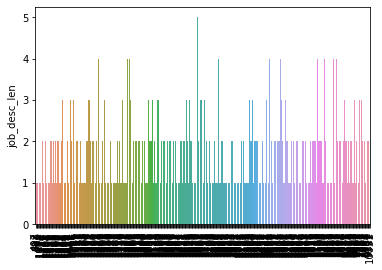

graph for no_of_competetors: total = 5


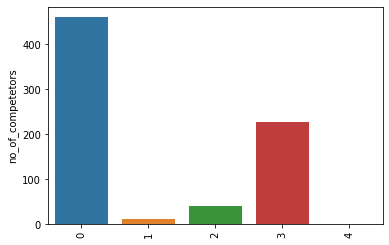

graph for job title new: total = 7


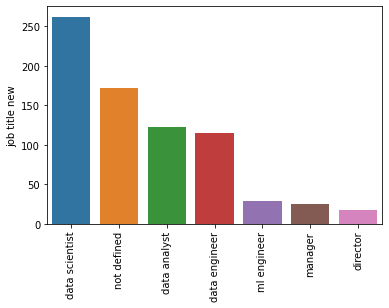

In [ ]:
for i in cols_for_graph:
    freq = df[i].value_counts()
    print("graph for %s: total = %d" % (i, len(freq)))
    chart = sns.barplot(x=freq.index, y=freq)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

graph for Location: total = 20


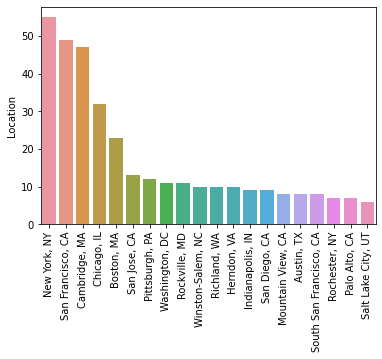

graph for Headquarters: total = 20


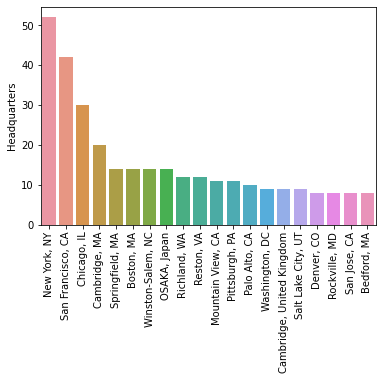

In [ ]:
for i in ['Location','Headquarters']:
    freq = df[i].value_counts().head(20)
    print("graph for %s: total = %d" % (i, len(freq)))
    chart = sns.barplot(x=freq.index, y=freq)
    chart.set_xticklabels(chart.get_xticklabels(), rotation=90)
    plt.show()

In [ ]:
df.columns

Index(['Job Title', 'Salary Estimate', 'Job Description', 'Rating',
       'Company Name', 'Location', 'Headquarters', 'Size', 'Founded',
       'Type of ownership', 'Industry', 'Sector', 'Revenue', 'Competitors',
       'Salary Estimate new', 'company name new', 'city', 'state', 'python',
       'r_studio', 'spark', 'aws', 'excel', 'exp_lvl', 'job title new',
       'job_desc_len', 'no_of_competetors'],
      dtype='object')

In [ ]:
df.groupby(['job title new' , 'exp_lvl'])['Salary Estimate new'].mean()

job title new   exp_lvl    
data analyst    junior          56500.000000
                not defined     65091.954023
                senior          89926.470588
data engineer   not defined     94967.948718
                senior         124689.189189
data scientist  junior         106500.000000
                not defined    106553.672316
                senior         139386.904762
director        not defined    166117.647059
manager         not defined     86760.869565
                senior         167500.000000
ml engineer     not defined    113947.368421
                senior         127600.000000
not defined     not defined     79121.848739
                senior         109066.037736
Name: Salary Estimate new, dtype: float64

In [ ]:
pd.DataFrame(df.groupby(['Location' , 'job title new'])['Salary Estimate new'].agg({np.mean}))

,,mean
Location,job title new,
"Agoura Hills, CA",data engineer,101000.000000
"Alabaster, AL",not defined,39500.000000
"Alameda, CA",not defined,93750.000000
"Albuquerque, NM",data scientist,74333.333333
"Alexandria, VA",data analyst,71000.000000
...,...,...
"Winter Park, FL",data engineer,71500.000000
"Woburn, MA",data scientist,110000.000000
"Woodbridge, NJ",data scientist,98500.000000


In [ ]:
pd.DataFrame(df.groupby(['state' ])['Salary Estimate new'].agg({np.mean}))

,mean
state,
AL,57937.500000
AZ,85666.666667
CA,123513.157895
CO,85636.363636
CT,71100.000000
DC,110181.818182
DE,55000.000000
FL,77625.000000
GA,80666.666667


In [ ]:
pd.DataFrame(df.groupby(['Sector'])['Salary Estimate new'].agg({np.mean}))

,mean
Sector,
-1,114650.000000
Accounting & Legal,113500.000000
Aerospace & Defense,99060.000000
Agriculture & Forestry,80500.000000
"Arts, Entertainment & Recreation",48500.000000
Biotech & Pharmaceuticals,112098.214286
Business Services,97701.030928
"Construction, Repair & Maintenance",53000.000000
Consumer Services,99875.000000


In [ ]:
pd.DataFrame(df.groupby(['Industry'])['Salary Estimate new'].agg({np.mean}))

,mean
Industry,
-1,114650.000000
Accounting,113500.000000
Advertising & Marketing,104300.000000
Aerospace & Defense,99060.000000
Architectural & Engineering Services,50500.000000
Auctions & Galleries,128000.000000
Banks & Credit Unions,70625.000000
Beauty & Personal Accessories Stores,85500.000000
Biotech & Pharmaceuticals,112098.214286


# Model building

## selecting cols req for model building

In [ ]:
df.head(2)

,Job Title,Salary Estimate,Job Description,Rating,Company Name,Location,Headquarters,Size,Founded,Type of ownership,...,state,python,r_studio,spark,aws,excel,exp_lvl,job title new,job_desc_len,no_of_competetors
0,Data Scientist,$53K-$91K (Glassdoor est.),"Data Scientist\nLocation: Albuquerque, NM\nEdu...",3.8,Tecolote Research\n3.8,"Albuquerque, NM","Goleta, CA",501 to 1000 employees,1973,Company - Private,...,NM,1,0,0,0,1,not defined,data scientist,2536,0
1,Healthcare Data Scientist,$63K-$112K (Glassdoor est.),What You Will Do:\n\nI. General Summary\n\nThe...,3.4,University of Maryland Medical System\n3.4,"Linthicum, MD","Baltimore, MD",10000+ employees,1984,Other Organization,...,MD,1,0,0,0,0,not defined,data scientist,4783,0


In [ ]:
relevant_cols = ['Rating' , 'Size' , 'Founded' , 'Type of ownership' , 'Industry' , 'Sector' , 'Revenue' , 'Salary Estimate new' ,  'city' , 'state' , 'python' , 'r_studio' , 'spark' , 'aws' , 'excel' , 'exp_lvl' , 'job title new' , 'job_desc_len' , 'no_of_competetors']

In [ ]:
df_model = df[relevant_cols]

In [ ]:
df_model.shape

(742, 19)

In [ ]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 742 entries, 0 to 955
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Rating               742 non-null    float64
 1   Size                 742 non-null    object 
 2   Founded              742 non-null    int64  
 3   Type of ownership    742 non-null    object 
 4   Industry             742 non-null    object 
 5   Sector               742 non-null    object 
 6   Revenue              742 non-null    object 
 7   Salary Estimate new  742 non-null    float64
 8   city                 742 non-null    object 
 9   state                742 non-null    object 
 10  python               742 non-null    int64  
 11  r_studio             742 non-null    int64  
 12  spark                742 non-null    int64  
 13  aws                  742 non-null    int64  
 14  excel                742 non-null    int64  
 15  exp_lvl              742 non-null    obj

## Dummy encoding

In [ ]:
df_dum = pd.get_dummies(df_model)

## train test split 

In [ ]:
from sklearn.model_selection import train_test_split

x = df_dum.drop('Salary Estimate new', axis =1)
y = df_dum['Salary Estimate new']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [ ]:
x.shape , y.shape

((742, 370), (742,))

## Multiple linear regression

we can implement linear regression using 2 libraries

Linear regression with sklearn[usually]

Linear regression with ordinary least squares with statsModel

### Linear regression using Scikitlearn & k fold cross validation

In [ ]:
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score

lm = LinearRegression()
lm.fit(x_train, y_train)

LinearRegression()

lets see all k fold cross validation scores [refer notes] , k = 3

In [ ]:
#  k fold cross validation scores
(cross_val_score(lm,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

array([-25611.16442387, -19612.87736173, -24829.98042085])

lets see the mean of all k cross val scores

In [ ]:
np.mean(cross_val_score(lm,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

-23351.340735484482

## Lasso regression with again cross val score

In [ ]:
lm_l = Lasso(alpha=.13)
lm_l.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.927e+10, tolerance: 8.092e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.13)

In [ ]:
(cross_val_score(lm_l,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+10, tolerance: 5.603e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.293e+10, tolerance: 5.212e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

array([-25671.61020845, -20041.09169402, -25252.36253871])

In [ ]:
np.mean(cross_val_score(lm_l,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.013e+10, tolerance: 5.603e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.293e+10, tolerance: 5.212e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

-23655.021480393032

finding mean cross val score for each alpha val

and visualizing it to see which alpha val gives the best cross val score

In [ ]:
alpha = []
cross_val_scores = []

for i in range(1,100):
    alpha.append(i/100)
    lml = Lasso(alpha=(i/100)) # 
    cross_val_scores.append(np.mean(cross_val_score(lml,x_train,y_train, scoring = 'neg_mean_absolute_error', cv= 3)))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.982e+10, tolerance: 5.603e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.287e+10, tolerance: 5.212e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisa

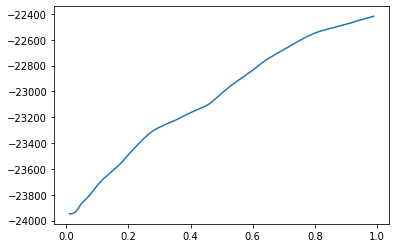

In [ ]:
plt.plot(alpha,cross_val_scores)

code to find which alpha val is giving the best cross val score

In [ ]:
err = tuple(zip(alpha,cross_val_scores))
df_err = pd.DataFrame(err, columns = ['alpha','error'])
df_err[df_err.error == max(df_err.error)]

,alpha,error
98,0.99,-22417.192238


## Random forest regressor model & its cross val score

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()

np.mean(cross_val_score(rf,x_train,y_train,scoring = 'neg_mean_absolute_error', cv= 3))

-15044.99649626553

## Comparing models on basis of cross val scores

so from previous observations 
1.   Linear regression gives cross val score of -23351.34
2.   lasso regression gives best score of - -22417.19 [at alpha = 0.99]
3.   random forest regressor with score of -14856.8874

clearly , random forest regressor has highest value out of all

## Hyperparameter tuning using gridsearchcv

now we'll apply gridsearchcv on random forest regressor

In [ ]:
from sklearn.model_selection import GridSearchCV

In [ ]:
# grid
parameters = {'n_estimators':range(10,300,10), 'criterion':('mse','mae'), 'max_features':('auto','sqrt','log2')}

In [ ]:
# applying gridsearch on rf-random forest
gs = GridSearchCV( rf , parameters,scoring='neg_mean_absolute_error',cv=3)
gs.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  FutureWarning,
/usr/local/lib/python3.7/dist-packages/sklearn/ensemble/_forest.py:400: 

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid={'criterion': ('mse', 'mae'),
                         'max_features': ('auto', 'sqrt', 'log2'),
                         'n_estimators': range(10, 300, 10)},
             scoring='neg_mean_absolute_error')

best score

In [ ]:
# best score
gs.best_score_

-14916.56893922674

so we improved just a tiny bit 

best parameters - ie parameters that give best score

In [ ]:
# best parameters 
gs.best_estimator_

RandomForestRegressor(criterion='mae', n_estimators=230)

## test & compare previous models using mean absolute error

but before that, lets re train lasso regression model on alpha = 0.99 [cuz it gave best output]

In [ ]:
lm_l_new = Lasso(alpha=.99)
lm_l_new.fit(x_train,y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_coordinate_descent.py:648: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 6.436e+10, tolerance: 8.092e+07
  coef_, l1_reg, l2_reg, X, y, max_iter, tol, rng, random, positive


Lasso(alpha=0.99)

In [ ]:
tpred_lm = lm.predict(x_test) # predictions using linear regression
tpred_lml = lm_l_new.predict(x_test) # same with lasso regression
tpred_rf = gs.best_estimator_.predict(x_test) # same using random forest

In [ ]:
from sklearn.metrics import mean_absolute_error
mean_absolute_error(y_test,tpred_lm) , mean_absolute_error(y_test,tpred_lml) , mean_absolute_error(y_test,tpred_rf)

(444372719426.80695, 16306.184889229076, 11734.213597899037)

clearly - random forest regressor gave the best result

## We can use/combine multiple models to predict vals

like in below we found the mean of predictions by lasso regression & random forest as final prediction

In [ ]:
mean_absolute_error(y_test,(tpred_lml+tpred_rf)/2)

13093.334883367768

# saving the model & doing some predictions

In [ ]:
#import pickle
#pickl = {'model': gs.best_estimator_}
#pickle.dump( pickl, open( 'model_file' + ".p", "wb" ) )

#file_name = "model_file.p"
#with open(file_name, 'rb') as pickled:
#    data = pickle.load(pickled)
#    model = data['model']

#model.predict(np.array(list(X_test.iloc[1,:])).reshape(1,-1))[0]

#list(X_test.iloc[1,:])